# Python for data-analysis

In [1]:
%autosave 60
%matplotlib inline

Autosaving every 60 seconds


In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pickle

Nous avons tout d'abord regardé notre dataset sur excel et nous avons modifié les valeurs qui étaient non quantitatives avec leurs vraies valeurs avec un "Ctr G" sur excel

In [3]:
#Voici donc la forme de notre DataFrame

file_path = "datasets/drug_consumption.csv"
# file_path = "C:/Users/erwan/OneDrive/Documents/COURS/drug_consumption.csv"

drug_DF = pd.read_csv('C:/Users/erwan/OneDrive/Documents/COURS/drug_consumption.csv', delimiter=";")

In [4]:
drug_DF.head(3)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used


In [5]:
drug_DF.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [6]:
drug_DF.shape

(1885, 32)

In [7]:
drug_DF.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [8]:
drug_DF.dtypes

ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore        object
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

On change le dtype de Nscore en float pour les futures études

In [9]:
drug_DF.Nscore=pd.to_numeric(drug_DF.Nscore, errors='coerce')

On remarque qu'il n'y a pas de NA dans notre dataset 

## Data-visualisation

In [10]:
#  Recherche et suppression des personnes non fiables grâce à leurs réponses sur leurs consommations 
#  de semeron qui n'existe pas.
  

semeron = drug_DF['Semer'].value_counts()
semeron

Never Used                1877
Used in Last Decade          3
Used over a Decade Ago       2
Used in Last Year            2
Used in Last Month           1
Name: Semer, dtype: int64

On retire alors 8 lignes du dataframe

In [11]:
drug_DF=drug_DF[drug_DF.Semer=='Never Used']

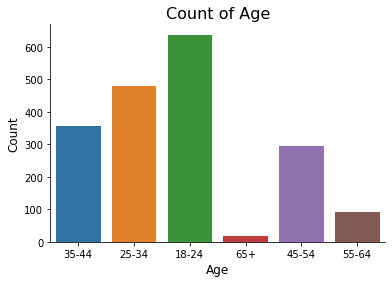

In [12]:
plt.title('Count of Age', size=16)
sns.countplot(drug_DF.Age)
plt.ylabel('Count', size=12)
plt.xlabel('Age', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

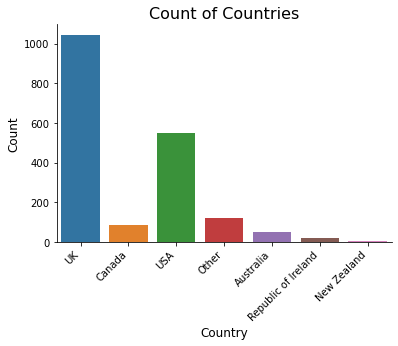

In [13]:
# On compte le nombre de personne par pays d'origine,
# on peut voir que la majorité des participants à l"étude ont pour origine le Royaume-Unis et les Etats-Unis

plt.title('Count of Countries', size=16)
sns.countplot(drug_DF.Country)
plt.ylabel('Count', size=12)
plt.xlabel('Country', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45, ha="right")
plt.show()

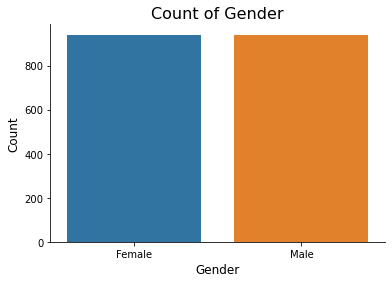

In [14]:
# On compte le nombre d'homme et de femme qui participent à l'étude,
# on remarque qu'il y a plus ou moins le même nombre de femmes et d'hommes

plt.title('Count of Gender', size=16)
sns.countplot(drug_DF.Gender)
plt.ylabel('Count', size=12)
plt.xlabel('Gender', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

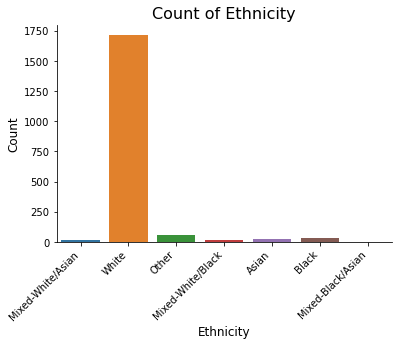

In [15]:
# La majorité des personnes interrogées ont pour ethnicité : Blanc

plt.title('Count of Ethnicity', size=16)
sns.countplot(drug_DF.Ethnicity)
plt.ylabel('Count', size=12)
plt.xlabel('Ethnicity', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45, ha="right")
plt.show()

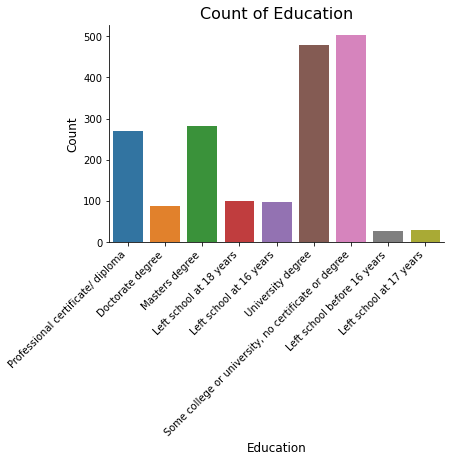

In [16]:
plt.title('Count of Education', size=16)
sns.countplot(drug_DF.Education)
plt.ylabel('Count', size=12)
plt.xlabel('Education', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45, ha="right")
plt.show()

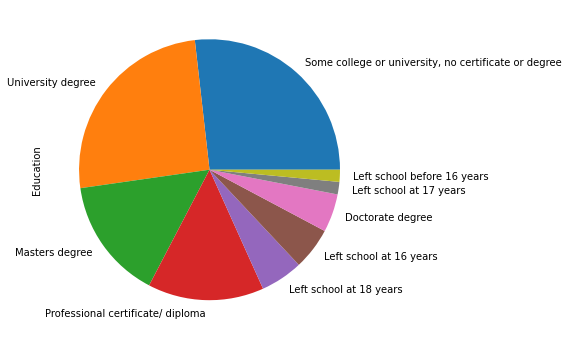

In [17]:
Education = drug_DF['Education'].value_counts()
Education.plot(kind='pie', figsize=(6, 6))

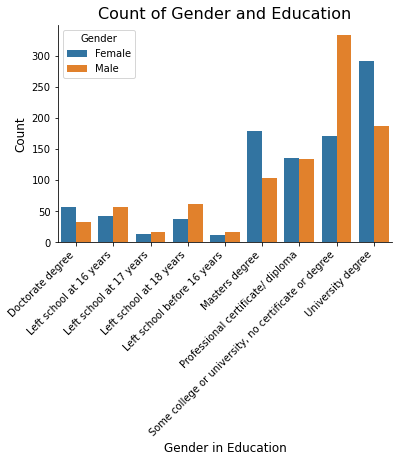

In [18]:
plt.title('Count of Gender and Education', size=16)
sns.countplot(x='Education', hue = 'Gender', data = drug_DF.sort_values(by=['Education']))
plt.ylabel('Count', size=12)
plt.xlabel('Gender in Education', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=45, ha="right")
plt.show()

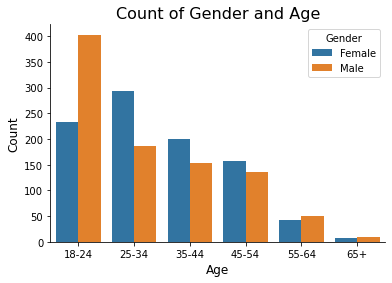

In [19]:
plt.title('Count of Gender and Age', size=16)
sns.countplot(x='Age', hue = 'Gender', data = drug_DF.sort_values(by=['Age']))
plt.ylabel('Count', size=12)
plt.xlabel('Age', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Etude des consommations de drogue

In [20]:
drug_columns=['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 
              'Crack','Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
              'Nicotine', 'Semer', 'VSA']

In [21]:
conso_DF=drug_DF[drug_columns]

In [22]:
conso_DF.describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877
unique,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,1,7
top,Used in Last Week,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Day,Used in Last Day,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Day,Never Used,Never Used
freq,758,973,1299,999,1380,458,805,1036,1622,1020,1600,1488,1092,1069,1424,982,607,1877,1452


On remarque que l'alcool, la cafféine, le chocolat et la nicotine sont des drogues qui sont utilisées plutot régulièrement par les personnes qui constituent le dataset tandis que les autres drogues sont majoritairement jamais consommé par ces memes personnes.

Par ailleur, la distribution du cannabis semble très équilibré au vu du faible nombre de personnes qui constituent la plus grande catégorie pour l'utilisation de ce dernier.

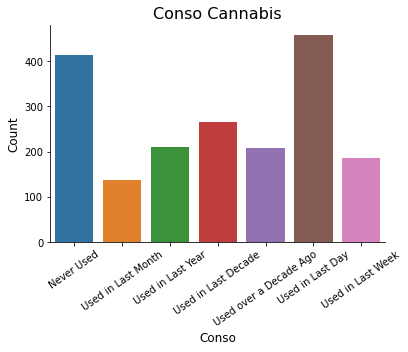

In [23]:
plt.title('Conso Cannabis', size=16)
sns.countplot(conso_DF.Cannabis)
plt.ylabel('Count', size=12)
plt.xlabel('Conso', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.xticks(rotation=35)
plt.show()

In [24]:
# Consommation de cannabis selon le pays et le genre en pourcentage

pd.crosstab([drug_DF.Gender,drug_DF.Country],drug_DF.Cannabis).apply(lambda r: r/r.sum()*100, axis=1).round(decimals=1, out=None)

Cannabis                    Never Used  Used in Last Day  Used in Last Decade  \
Gender Country                                                                  
Female Australia                  10.0              20.0                 15.0   
       Canada                     22.0              19.5                 22.0   
       New Zealand                 0.0               0.0                100.0   
       Other                      25.0              22.2                 16.7   
       Republic of Ireland        33.3              33.3                 11.1   
       UK                         42.1               5.1                 20.5   
       USA                         5.3              44.9                  7.2   
Male   Australia                   0.0              31.2                  9.4   
       Canada                      8.7              41.3                  6.5   
       New Zealand                 0.0              50.0                  0.0   
       Other                       3.7              39.0                  8.5   
       Republic of Ireland         0.0              45.5                  0.0   
       UK                         24.7              17.8                 15.7   
       USA                         1.7              48.5                  7.0   

Cannabis                    Used in Last Month  Used in Last Week  \
Gender Country                                                      
Female Australia                          15.0               15.0   
       Canada                              7.3                9.8   
       New Zealand                         0.0                0.0   
       Other                               2.8               13.9   
       Republic of Ireland                11.1                0.0   
       UK                                  2.4                3.0   
       USA                                13.5               14.5   
Male   Australia                          15.6               21.9   
       Canada                             13.0                8.7   
       New Zealand                        50.0                0.0   
       Other                              13.4               20.7   
       Republic of Ireland                18.2               18.2   
       UK                                  5.5                9.3   
       USA                                11.0               16.0   

Cannabis                    Used in Last Year  Used over a Decade Ago  
Gender Country                                                         
Female Australia                         15.0                    10.0  
       Canada                             7.3                    12.2  
       New Zealand                        0.0                     0.0  
       Other                              8.3                    11.1  
       Republic of Ireland                0.0                    11.1  
       UK                                10.3                    16.5  
       USA                               12.6                     1.9  
Male   Australia                         18.8                     3.1  
       Canada                            17.4                     4.3  
       New Zealand                        0.0                     0.0  
       Other                             12.2                     2.4  
       Republic of Ireland               18.2                     0.0  
       UK                                 9.5                    17.6  
       USA                               13.1                     2.6

### Etude sur la personnalité

In [25]:
personality=['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
personality_DF = drug_DF[personality]

Nscore = Névrosisme, 
Escore = Extraversion, 
Oscore = Ouverture à l'expérience, 
Ascore = agréabilité, 
Cscore = Conscience, 
Impulsive = impulsivité,
SS = recherche de sensation,


In [26]:
personality_DF.describe()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1863.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,-0.015468,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408
std,0.987186,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.051880,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


Pour ce problème, nous allons créer deux classes que nous allons vouloir prédire : 
- Une classe composée de Never Used, Used over a decade Ago, Used in the last decade 
- l'autre classe avec Used in the last year, Used in the last Month, Used in the last Week et Used in the last day

In [27]:
drug_DF=drug_DF[drug_DF.Semer=='Never Used']

In [28]:
for k in drug_DF:
    drug_DF[k][drug_DF[k]=='Never Used'] = 0
    drug_DF[k][drug_DF[k]=='Used over a Decade Ago'] = 0
    drug_DF[k][drug_DF[k]=='Used in Last Decade'] = 0
    drug_DF[k][drug_DF[k]=='Used in Last Year'] = 1
    drug_DF[k][drug_DF[k]=='Used in Last Month'] = 1
    drug_DF[k][drug_DF[k]=='Used in Last Week'] = 1
    drug_DF[k][drug_DF[k]=='Used in Last Day'] = 1    

In [29]:
drug_DF

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,0,0
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,1,0,0,0,0,1,0,1,0,0
2,3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,0,0,0
3,4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,0,0,0
4,5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,18-24,Female,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,1,1,0,0,0,0,1
1881,1885,18-24,Male,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,0,0,0,1,1,1,1,1,0,0
1882,1886,25-34,Female,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,1,0,0,0,0,0,0,1,0,0
1883,1887,18-24,Female,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,1,0,0,1,1,0,1,1,0,0


In [30]:
columns_for_corr=['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
                  'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                  'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
                  'Nicotine',  'VSA']

In [31]:
for k in columns_for_corr:
    drug_DF[k]=pd.to_numeric(drug_DF[k], errors='coerce')
    
drug_DF.dtypes

ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol        int64
Amphet         int64
Amyl           int64
Benzos         int64
Caff           int64
Cannabis       int64
Choc           int64
Coke           int64
Crack          int64
Ecstasy        int64
Heroin         int64
Ketamine       int64
Legalh         int64
LSD            int64
Meth           int64
Mushrooms      int64
Nicotine       int64
Semer         object
VSA            int64
dtype: object

In [32]:
df_for_corr=drug_DF[columns_for_corr]

In [33]:
corr = df_for_corr.corr(method="spearman")
corr

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
Nscore,1.000000,-0.412461,0.006214,-0.204269,-0.372172,0.168745,0.089583,-0.016162,0.124816,0.047402,...,0.091202,0.044603,0.145304,0.056917,0.079839,0.007363,0.174068,0.031235,0.133343,0.086599
Escore,-0.412461,1.000000,0.226260,0.161784,0.290479,0.119210,0.189641,0.036237,-0.026214,0.015256,...,-0.015665,0.087723,-0.056613,0.038214,0.001823,0.037752,-0.087128,0.042003,-0.026366,-0.020413
Oscore,0.006214,0.226260,1.000000,0.036995,-0.073167,0.270398,0.404787,0.027809,0.213379,0.057595,...,0.067160,0.258862,0.089110,0.150552,0.298416,0.318645,0.179791,0.320378,0.224792,0.090838
Ascore,-0.204269,0.161784,0.036995,1.000000,0.236550,-0.225828,-0.208106,-0.020703,-0.125817,-0.094730,...,-0.066014,-0.088407,-0.125293,-0.081953,-0.119016,-0.047903,-0.145388,-0.075892,-0.111086,-0.065964
Cscore,-0.372172,0.290479,-0.073167,0.236550,1.000000,-0.344500,-0.254003,-0.031504,-0.231168,-0.085772,...,-0.104598,-0.199357,-0.115749,-0.134133,-0.231819,-0.127191,-0.180978,-0.159822,-0.241480,-0.109660
Impulsive,0.168745,0.119210,0.270398,-0.225828,-0.344500,1.000000,0.628217,0.027807,0.270253,0.072201,...,0.139498,0.236023,0.153453,0.147934,0.251552,0.180606,0.168780,0.212109,0.233744,0.113063
SS,0.089583,0.189641,0.404787,-0.208106,-0.254003,0.628217,1.000000,0.086503,0.324380,0.143298,...,0.142121,0.364936,0.172567,0.216133,0.400792,0.324609,0.219276,0.328579,0.325338,0.147416
Alcohol,-0.016162,0.036237,0.027809,-0.020703,-0.031504,0.027807,0.086503,1.000000,0.044753,0.068501,...,0.058353,0.105945,0.029624,0.071355,0.091666,0.082657,-0.005800,0.077573,0.077849,0.054058
Amphet,0.124816,-0.026214,0.213379,-0.125817,-0.231168,0.270253,0.324380,0.044753,1.000000,0.225286,...,0.193837,0.458740,0.306256,0.321562,0.468504,0.395795,0.381867,0.377584,0.311119,0.166358
Amyl,0.047402,0.015256,0.057595,-0.094730,-0.085772,0.072201,0.143298,0.068501,0.225286,1.000000,...,0.077250,0.280162,0.100451,0.283387,0.280144,0.122639,0.091902,0.158426,0.142532,0.110031


In [34]:
corr =corr.drop('Escore',0)
corr =corr.drop('Oscore',0)
corr =corr.drop('Ascore',0)
corr =corr.drop('Cscore',0)
corr =corr.drop('Impulsive',0)
corr =corr.drop('SS',0)

In [35]:
corr =corr.drop('Alcohol',1)
corr =corr.drop('Amphet',1)
corr =corr.drop('Amyl',1)
corr =corr.drop('Benzos',1)
corr =corr.drop('Caff',1)
corr =corr.drop('Cannabis',1)
corr =corr.drop('Choc',1)
corr =corr.drop('Coke',1)
corr =corr.drop('Crack',1)
corr =corr.drop('Ecstasy',1)
corr =corr.drop('Heroin',1)
corr =corr.drop('Ketamine',1)
corr =corr.drop('Legalh',1)
corr =corr.drop('LSD',1)
corr =corr.drop('Meth',1)
corr =corr.drop('Mushrooms',1)
corr =corr.drop('Nicotine',1)
corr =corr.drop('VSA',1)

In [36]:
corr

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
Nscore,1.000000,-0.412461,0.006214,-0.204269,-0.372172,0.168745,0.089583
Alcohol,-0.016162,0.036237,0.027809,-0.020703,-0.031504,0.027807,0.086503
Amphet,0.124816,-0.026214,0.213379,-0.125817,-0.231168,0.270253,0.324380
Amyl,0.047402,0.015256,0.057595,-0.094730,-0.085772,0.072201,0.143298
Benzos,0.232552,-0.061667,0.195058,-0.152859,-0.185348,0.215929,0.262948
Caff,0.007966,0.052090,0.057221,-0.019840,-0.053742,0.071852,0.095580
Cannabis,0.118987,-0.027623,0.394190,-0.128599,-0.296023,0.292635,0.455906
Choc,0.010574,-0.009244,0.024724,0.004948,-0.035380,-0.017961,0.000379
Coke,0.110718,0.046174,0.149920,-0.155877,-0.178330,0.229338,0.308121
Crack,0.091202,-0.015665,0.067160,-0.066014,-0.104598,0.139498,0.142121


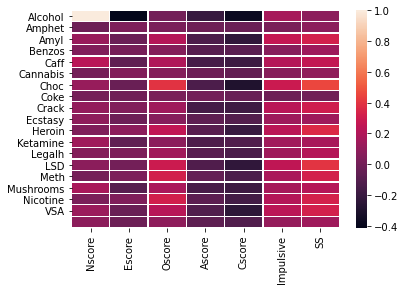

In [37]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=['Alcohol',
                  'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                  'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
                  'Nicotine',  'VSA'],linewidths=0.30)

# Modélisation

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [39]:
drug_DF = pd.read_csv('C:/Users/erwan/OneDrive/Documents/COURS/drug_consumption_api.csv', delimiter=";")

In [40]:
X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Alcohol"]

In [41]:
X.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [42]:
X.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'],
      dtype='object')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Logistic regression

In [45]:
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
acc_lr

0.9177718832891246

92,8% qui est un bon résultat regardons la matrice de confusion

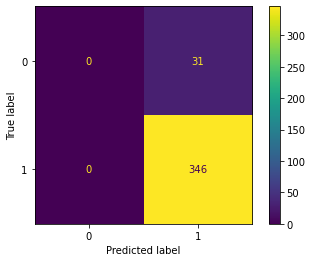

In [47]:
plot_confusion_matrix(logreg, X=X_test, y_true=y_test) 

Toutes les valeurs ont été prédite en dans la catégorie 1 nous allons rééquilibrer les labels dans le training set afin d'avoir des résultats cohérents (pas uniquement des prédictions dans 1)

#### Up-sampling

In [48]:
X_train['Alcohol']=y_train

from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
df_minoritytrain = X_train[X_train.Alcohol==0] 
df_majoritytrain = X_train[X_train.Alcohol==1]

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Alcohol']
X_train=df
X_train=X_train.drop(['Alcohol'],axis='columns')

In [49]:
df_minoritytrain.shape[0]

105

In [50]:
df_majoritytrain.shape[0]

1403

In [51]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [52]:
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
acc_lr

0.6180371352785146

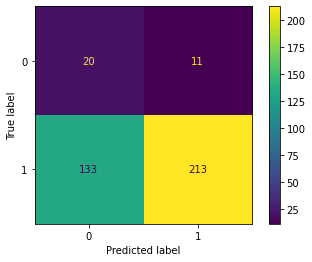

In [53]:
plot_confusion_matrix(logreg, X=X_test, y_true=y_test) 

Les résultats plus moins bons que avant le sampling mais cela est du au dataset qui a beaucoup de 1 et très peu de 0.
Avant le sampling, l'algo apprennait beaucoup plus pour 1 que pour 0 et ne prédisait que des 1. Après ce sampling, il apprend autant sur les deux mais vu que il y a une majorité de 1, il va beaucoup plus se trompé en prédisant des 0.

### XGBOOST

In [54]:
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

[18:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
acc_xgb

0.6657824933687002

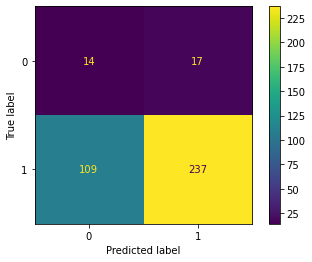

In [56]:
plot_confusion_matrix(xg_reg, X=X_test, y_true=y_test) 

Résultat égal au model lr en acc (plus d'erreur sur les 0 et moins sur les 1 qu'avec le model lr)

### MLP

In [57]:
from sklearn.neural_network import MLPClassifier
model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
y_pred = MLP_model.predict(X_test)

In [58]:
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
acc_mlp

0.8859416445623343

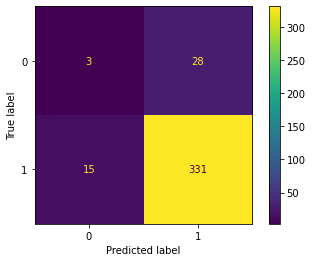

In [59]:
plot_confusion_matrix(MLP_model, X=X_test, y_true=y_test) 

Accuracy bien meilleure mais seulement des bonnes prédictions pour le 1 et que des prédictions fausses pour les 0 

### RF

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100,random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [61]:
acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
acc_rf

0.9151193633952255

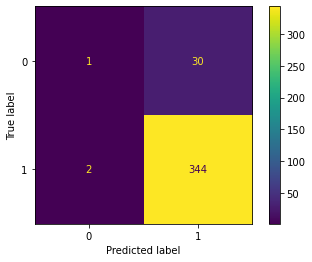

In [62]:
plot_confusion_matrix(clf, X=X_test, y_true=y_test) 

In [63]:
Liste_acc=[acc_lr,acc_xgb,acc_mlp,acc_rf]

In [64]:
if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Alcohol.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Alcohol.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Alcohol.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Alcohol.pickle', 'wb'))

Résultat équivalent a lr avant le up-sampling -> bon pourcentage mais prédiction de 1 uniquement -> sans interet

## Modèles de prédictions pour les autres consommations

In [65]:
drug_DF.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [66]:
X.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'],
      dtype='object')

## Amphet comsommation

In [67]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool


X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Amphet"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Amphet']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Amphet==0].shape[0]<X_train[X_train.Amphet==1].shape[0]:
    df_minoritytrain = X_train[X_train.Amphet==0] 
    df_majoritytrain = X_train[X_train.Amphet==1]   
else :
    df_minoritytrain = X_train[X_train.Amphet==1] 
    df_majoritytrain = X_train[X_train.Amphet==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Amphet']
X_train=df
X_train=X_train.drop(['Amphet'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Amphet.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Amphet.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Amphet.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Amphet.pickle', 'wb'))

[18:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Amyl consommation

In [68]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

#Encoder
X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Amyl"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Amyl']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Amyl==0].shape[0]<X_train[X_train.Amyl==1].shape[0]:
    df_minoritytrain = X_train[X_train.Amyl==0] 
    df_majoritytrain = X_train[X_train.Amyl==1]   
else :
    df_minoritytrain = X_train[X_train.Amyl==1] 
    df_majoritytrain = X_train[X_train.Amyl==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Amyl']
X_train=df
X_train=X_train.drop(['Amyl'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Amyl.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Amyl.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Amyl.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Amyl.pickle', 'wb'))

[18:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Benzos consommation

In [69]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

#Encoder
X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Benzos"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Benzos']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Benzos==0].shape[0]<X_train[X_train.Benzos==1].shape[0]:
    df_minoritytrain = X_train[X_train.Benzos==0] 
    df_majoritytrain = X_train[X_train.Benzos==1]   
else :
    df_minoritytrain = X_train[X_train.Benzos==1] 
    df_majoritytrain = X_train[X_train.Benzos==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Benzos']
X_train=df
X_train=X_train.drop(['Benzos'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Benzos.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Benzos.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Benzos.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Benzos.pickle', 'wb'))

[18:28:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Caff consommation

In [70]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

#Encoder
X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Caff"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Caff']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Caff==0].shape[0]<X_train[X_train.Caff==1].shape[0]:
    df_minoritytrain = X_train[X_train.Caff==0] 
    df_majoritytrain = X_train[X_train.Caff==1]   
else :
    df_minoritytrain = X_train[X_train.Caff==1] 
    df_majoritytrain = X_train[X_train.Caff==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Caff']
X_train=df
X_train=X_train.drop(['Caff'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Caff.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Caff.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Caff.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Caff.pickle', 'wb'))

[18:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Cannabis consommation

In [71]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

#Encoder
X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Cannabis"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Cannabis']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Cannabis==0].shape[0]<X_train[X_train.Cannabis==1].shape[0]:
    df_minoritytrain = X_train[X_train.Cannabis==0] 
    df_majoritytrain = X_train[X_train.Cannabis==1]   
else :
    df_minoritytrain = X_train[X_train.Cannabis==1] 
    df_majoritytrain = X_train[X_train.Cannabis==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Cannabis']
X_train=df
X_train=X_train.drop(['Cannabis'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Cannabis.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Cannabis.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Cannabis.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Cannabis.pickle', 'wb'))

[18:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Choc consommation

In [72]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

#Encoder
X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Choc"]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Choc']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Choc==0].shape[0]<X_train[X_train.Choc==1].shape[0]:
    df_minoritytrain = X_train[X_train.Choc==0] 
    df_majoritytrain = X_train[X_train.Choc==1]   
else :
    df_minoritytrain = X_train[X_train.Choc==1] 
    df_majoritytrain = X_train[X_train.Choc==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Choc']
X_train=df
X_train=X_train.drop(['Choc'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Choc.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Choc.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Choc.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Choc.pickle', 'wb'))

[18:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Coke consommation

In [73]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

#Encoder
X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Coke"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Coke']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Coke==0].shape[0]<X_train[X_train.Coke==1].shape[0]:
    df_minoritytrain = X_train[X_train.Coke==0] 
    df_majoritytrain = X_train[X_train.Coke==1]   
else :
    df_minoritytrain = X_train[X_train.Coke==1] 
    df_majoritytrain = X_train[X_train.Coke==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Coke']
X_train=df
X_train=X_train.drop(['Coke'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Coke.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Coke.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Coke.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Coke.pickle', 'wb'))

[18:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Crack consommation

In [74]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

#Encoder
X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Crack"]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Crack']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Crack==0].shape[0]<X_train[X_train.Crack==1].shape[0]:
    df_minoritytrain = X_train[X_train.Crack==0] 
    df_majoritytrain = X_train[X_train.Crack==1]   
else :
    df_minoritytrain = X_train[X_train.Crack==1] 
    df_majoritytrain = X_train[X_train.Crack==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Crack']
X_train=df
X_train=X_train.drop(['Crack'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Crack.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Crack.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Crack.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Crack.pickle', 'wb'))

[18:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Ecstasy consommation

In [75]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool


X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Ecstasy"]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Ecstasy']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Ecstasy==0].shape[0]<X_train[X_train.Ecstasy==1].shape[0]:
    df_minoritytrain = X_train[X_train.Ecstasy==0] 
    df_majoritytrain = X_train[X_train.Ecstasy==1]   
else :
    df_minoritytrain = X_train[X_train.Ecstasy==1] 
    df_majoritytrain = X_train[X_train.Ecstasy==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Ecstasy']
X_train=df
X_train=X_train.drop(['Ecstasy'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Ecstasy.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Ecstasy.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Ecstasy.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Ecstasy.pickle', 'wb'))

[18:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Heroin consommation

In [76]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

#Encoder
X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Heroin"]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Heroin']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Heroin==0].shape[0]<X_train[X_train.Heroin==1].shape[0]:
    df_minoritytrain = X_train[X_train.Heroin==0] 
    df_majoritytrain = X_train[X_train.Heroin==1]   
else :
    df_minoritytrain = X_train[X_train.Heroin==1] 
    df_majoritytrain = X_train[X_train.Heroin==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Heroin']
X_train=df
X_train=X_train.drop(['Heroin'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Heroin.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Heroin.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Heroin.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Heroin.pickle', 'wb'))

[18:29:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Ketamine consommation

In [77]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool


X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Ketamine"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Ketamine']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Ketamine==0].shape[0]<X_train[X_train.Ketamine==1].shape[0]:
    df_minoritytrain = X_train[X_train.Ketamine==0] 
    df_majoritytrain = X_train[X_train.Ketamine==1]   
else :
    df_minoritytrain = X_train[X_train.Ketamine==1] 
    df_majoritytrain = X_train[X_train.Ketamine==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Ketamine']
X_train=df
X_train=X_train.drop(['Ketamine'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Ketamine.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Ketamine.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Ketamine.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Ketamine.pickle', 'wb'))

[18:30:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Legalh consommation

In [78]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool


X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Legalh"]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Legalh']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Legalh==0].shape[0]<X_train[X_train.Legalh==1].shape[0]:
    df_minoritytrain = X_train[X_train.Legalh==0] 
    df_majoritytrain = X_train[X_train.Legalh==1]   
else :
    df_minoritytrain = X_train[X_train.Legalh==1] 
    df_majoritytrain = X_train[X_train.Legalh==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Legalh']
X_train=df
X_train=X_train.drop(['Legalh'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Legalh.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Legalh.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Legalh.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Legalh.pickle', 'wb'))

[18:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# LSD consommation

In [79]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool


X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["LSD"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['LSD']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.LSD==0].shape[0]<X_train[X_train.LSD==1].shape[0]:
    df_minoritytrain = X_train[X_train.LSD==0] 
    df_majoritytrain = X_train[X_train.LSD==1]   
else :
    df_minoritytrain = X_train[X_train.LSD==1] 
    df_majoritytrain = X_train[X_train.LSD==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['LSD']
X_train=df
X_train=X_train.drop(['LSD'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_LSD.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_LSD.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_LSD.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_LSD.pickle', 'wb'))

[18:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Meth consommation

In [80]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Meth"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Meth']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Meth==0].shape[0]<X_train[X_train.Meth==1].shape[0]:
    df_minoritytrain = X_train[X_train.Meth==0] 
    df_majoritytrain = X_train[X_train.Meth==1]   
else :
    df_minoritytrain = X_train[X_train.Meth==1] 
    df_majoritytrain = X_train[X_train.Meth==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Meth']
X_train=df
X_train=X_train.drop(['Meth'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Meth.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Meth.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Meth.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Meth.pickle', 'wb'))

[18:30:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Mushrooms consommation

In [81]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Mushrooms"]

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Mushrooms']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Mushrooms==0].shape[0]<X_train[X_train.Mushrooms==1].shape[0]:
    df_minoritytrain = X_train[X_train.Mushrooms==0] 
    df_majoritytrain = X_train[X_train.Mushrooms==1]   
else :
    df_minoritytrain = X_train[X_train.Mushrooms==1] 
    df_majoritytrain = X_train[X_train.Mushrooms==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Mushrooms']
X_train=df
X_train=X_train.drop(['Mushrooms'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Mushrooms.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Mushrooms.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Mushrooms.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Mushrooms.pickle', 'wb'))

[18:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Nicotine consommation

In [82]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Mushrooms"]



#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Mushrooms']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Mushrooms==0].shape[0]<X_train[X_train.Mushrooms==1].shape[0]:
    df_minoritytrain = X_train[X_train.Mushrooms==0] 
    df_majoritytrain = X_train[X_train.Mushrooms==1]   
else :
    df_minoritytrain = X_train[X_train.Mushrooms==1] 
    df_majoritytrain = X_train[X_train.Mushrooms==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Mushrooms']
X_train=df
X_train=X_train.drop(['Mushrooms'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Nicotine.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Nicotine.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Nicotine.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_Nicotine.pickle', 'wb'))

[18:31:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# VSA consommation

In [83]:
# On ne fait que reprendre les étpes précedemment effectuées avec l'alcool

X, y = drug_DF.drop(['Alcohol','Semer','ID','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'], axis=1), drug_DF["Mushrooms"]


#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.isna().sum()
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

X_train['Mushrooms']=y_train


#Resample
from sklearn.utils import resample
# Exemple up sampling -  pour les données déséquilibrées
# Séparer class majoritaires et class minoritaires 
if X_train[X_train.Mushrooms==0].shape[0]<X_train[X_train.Mushrooms==1].shape[0]:
    df_minoritytrain = X_train[X_train.Mushrooms==0] 
    df_majoritytrain = X_train[X_train.Mushrooms==1]   
else :
    df_minoritytrain = X_train[X_train.Mushrooms==1] 
    df_majoritytrain = X_train[X_train.Mushrooms==0]  

# Sur-classe minoritaire
df_minority_upsampledtrain = resample(df_minoritytrain, 
replace=True,    # sample without replacement
n_samples=df_majoritytrain.shape[0],     # to match minority class
random_state=123) # reproducible results
 
# Combiner la classe minoritaire avec la classe minoritaire suréchantillonnée
df = pd.concat([df_majoritytrain, df_minority_upsampledtrain])
    
    
y_train=df['Mushrooms']
X_train=df
X_train=X_train.drop(['Mushrooms'],axis='columns')
Liste_acc=[]


#LR

logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
acc_lr = accuracy_score(y_true=y_test, y_pred=logreg.predict(X_test))
Liste_acc+=[acc_lr]

#XGB

xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)
acc_xgb = accuracy_score(y_true=y_test, y_pred=xg_reg.predict(X_test))
Liste_acc+=[acc_xgb]

#MLP

model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
MLP_model = MLPClassifier(**model_params,random_state=0)

MLP_model.fit(X_train, y_train)
acc_mlp = accuracy_score(y_true=y_test, y_pred=MLP_model.predict(X_test))
Liste_acc+=[acc_mlp]

#RF

clf=RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

acc_rf = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))
Liste_acc+=[acc_rf]


if max(Liste_acc)==acc_lr :
    pickle.dump(logreg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_VSA.pickle', 'wb'))
if max(Liste_acc)==acc_xgb :
    pickle.dump(xg_reg, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_VSA.pickle', 'wb'))
if max(Liste_acc)==acc_mlp :
    pickle.dump(MLP_model, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_VSA.pickle', 'wb'))
if max(Liste_acc)==acc_rf :
    pickle.dump(clf, open('C:/Users/erwan/OneDrive/Documents/COURS/Projet_Data/final_prediction_VSA.pickle', 'wb'))

[18:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
